In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('heart.csv')

In [26]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Chest Pain Type Description
TA = Typical angina (TA) is defined as substernal chest pain precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin 
 
ATA = When one experiences chest pain that doesn't meet the criteria for angina, it's known as atypical chest pain. Angina chest pain is a pressure or squeezing like sensation that is usually caused when your heart muscle doesn't get an adequate supply of oxygenated blood

NAP = Nonanginal chest pain is a common symptom of many conditions, ranging from gastrointestinal problems to psychiatric conditions. It may feel like a pressure or squeezing pain behind the breast bone. People should speak with a healthcare professional to find out what may be causing their chest pain

ASY = Silent (asymptomatic) myocardial ischemia (SMI) is defined as a transient alteration in myocardial perfusion in the absence of chest pain or the usual anginal equivalents.

## ASY Pain Type
Looking for a connection to predict cardiovasicular disease in a person that is ASY

<BarContainer object of 496 artists>

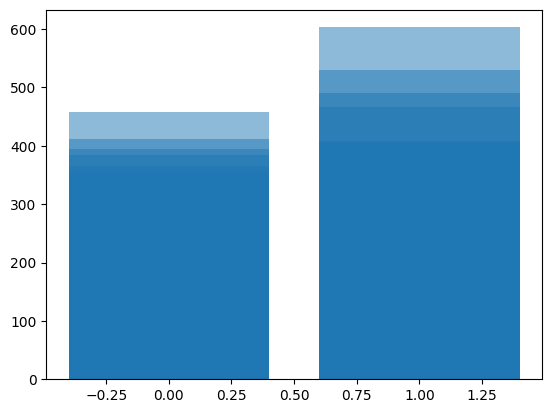

In [33]:
asy_heart = data[data['ChestPainType'] == 'ASY']
#asy_heart = asy_heart[asy_heart['HeartDisease'] == 1]
asy_heart[asy_heart['Cholesterol'] > 240]
plt.bar(x = asy_heart['HeartDisease'], height = asy_heart['Cholesterol'], align='center', alpha=0.5)


In [7]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object